In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score,classification_report
from sklearn.tree import DecisionTreeRegressor
import numpy as np
#from xgboost import XGBRegressor

In [3]:
#Data load
print("Lets Load the Datasheet........\n")
df = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")

Lets Load the Datasheet........



In [4]:
#Check The Rows And Columns of the Datasets.
def shape():
    return f"The Total Rows of the Datasets is {df.shape[0]} and the total Columns is {df.shape[1]}.\n"
shape_object = shape()
print(shape_object)


The Total Rows of the Datasets is 4340 and the total Columns is 8.



In [5]:
#Show some data of the Datasets

print("Lets see some datasets valus..........\n")
df.head()

Lets see some datasets valus..........



,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [6]:
#Cleaning Data
print("Lets Clean the datasets.......\n")

print("Lets see there is any Null Values are not......\n")

df.isnull().sum()

Lets Clean the datasets.......

Lets see there is any Null Values are not......



name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [7]:
#Lets use some encoding technique to encode the Labeled data from the datasets.

print(df['fuel'].unique())
print(df['seller_type'].unique())
print(df['transmission'].unique())
print(df['owner'].unique())

['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [8]:
print("Lets see the Full Dataset After this encoding.......\n")
df.head(10)

Lets see the Full Dataset After this encoding.......



,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [9]:
#Lets Make two new columns of this Name of the cars that is "Brand", "Unique Model"

print("Lets Make two new columns of this Name of the cars that is 'Brand', 'Unique Model'..........\n")

df['brand'] = df["name"].str.split(' ').str[:2]
df['unique_model_number'] = df["name"].str.split(' ').str[2::]

df['brand'] = df['brand'].apply(lambda x : ' '.join(x))
df['unique_model_number'] = df['unique_model_number'].apply(lambda y: ' '.join(y))

print("Lets see the Updated data sheet after the making this new columns.........\n")
df.head()

Lets Make two new columns of this Name of the cars that is 'Brand', 'Unique Model'..........

Lets see the Updated data sheet after the making this new columns.........



,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,unique_model_number
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti 800,AC
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti Wagon,R LXI Minor
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai Verna,1.6 SX
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun RediGO,T Option
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda Amaze,VX i-DTEC


In [10]:
print("Lets Drope the Unwanted Name Column from the datasheets and see the updated datasets.......\n")

df.drop('name',axis=1,inplace=True)

df.head()

Lets Drope the Unwanted Name Column from the datasheets and see the updated datasets.......



,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,unique_model_number
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti 800,AC
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti Wagon,R LXI Minor
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai Verna,1.6 SX
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun RediGO,T Option
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda Amaze,VX i-DTEC


In [11]:
#Lets Rearrange the columns of this datasets for batter result

new_order = ['brand','unique_model_number','year','fuel','transmission','km_driven','owner','seller_type','selling_price']

df = df.reindex(columns=new_order)

print("Check the columns after the Giving New Indexing.............\n")
df.head()

Check the columns after the Giving New Indexing.............



,brand,unique_model_number,year,fuel,transmission,km_driven,owner,seller_type,selling_price
0,Maruti 800,AC,2007,Petrol,Manual,70000,First Owner,Individual,60000
1,Maruti Wagon,R LXI Minor,2007,Petrol,Manual,50000,First Owner,Individual,135000
2,Hyundai Verna,1.6 SX,2012,Diesel,Manual,100000,First Owner,Individual,600000
3,Datsun RediGO,T Option,2017,Petrol,Manual,46000,First Owner,Individual,250000
4,Honda Amaze,VX i-DTEC,2014,Diesel,Manual,141000,Second Owner,Individual,450000


In [12]:
#Lets Describe all the Datasets Columns.
print("Lets Describe all the datasets columns..........\n")
df.describe(include='all')

Lets Describe all the datasets columns..........



,brand,unique_model_number,year,fuel,transmission,km_driven,owner,seller_type,selling_price
count,4340,4340,4340.000000,4340,4340,4340.000000,4340,4340,4.340000e+03
unique,189,1388,NaN,5,2,NaN,5,3,NaN
top,Maruti Swift,Dzire VDI,NaN,Diesel,Manual,NaN,First Owner,Individual,NaN
freq,320,69,NaN,2153,3892,NaN,2832,3244,NaN
mean,NaN,NaN,2013.090783,NaN,NaN,66215.777419,NaN,NaN,5.041273e+05
std,NaN,NaN,4.215344,NaN,NaN,46644.102194,NaN,NaN,5.785487e+05
min,NaN,NaN,1992.000000,NaN,NaN,1.000000,NaN,NaN,2.000000e+04
25%,NaN,NaN,2011.000000,NaN,NaN,35000.000000,NaN,NaN,2.087498e+05
50%,NaN,NaN,2014.000000,NaN,NaN,60000.000000,NaN,NaN,3.500000e+05
75%,NaN,NaN,2016.000000,NaN,NaN,90000.000000,NaN,NaN,6.000000e+05


In [13]:
#Lets Encode the Requered Columns of the Datasets.
print("Lets Encode the requered Columns of the datasets..........\n")

temp1 = []
temp2 = []

for i in df.columns:
    if df[i].dtype == 'object':
        temp1.append(i)
    else:
        temp2.append(i)
print("Object Data Types Column list :",temp1)
print("Int or Float Data Types Column list :",temp2)

Lets Encode the requered Columns of the datasets..........

Object Data Types Column list : ['brand', 'unique_model_number', 'fuel', 'transmission', 'owner', 'seller_type']
Int or Float Data Types Column list : ['year', 'km_driven', 'selling_price']


In [14]:
#Lets Encode the Labeled Data or Object data type columns.
print("Lets Encode the Labeled Data or Object data type columns.........\n")
lb = LabelEncoder()
lb2 = LabelEncoder()
for i in temp1:
    df[i] = lb.fit_transform(df[i])

print("Lets see the encoded data............\n")
df.head()

Lets Encode the Labeled Data or Object data type columns.........

Lets see the encoded data............



,brand,unique_model_number,year,fuel,transmission,km_driven,owner,seller_type,selling_price
0,97,431,2007,4,1,70000,0,1,60000
1,117,960,2007,4,1,50000,0,1,135000
2,69,231,2012,1,1,100000,0,1,600000
3,27,1103,2017,4,1,46000,0,1,250000
4,47,1182,2014,1,1,141000,2,1,450000


In [15]:
print(shape_object)

The Total Rows of the Datasets is 4340 and the total Columns is 8.



Lets check there is any outlieres or not.........



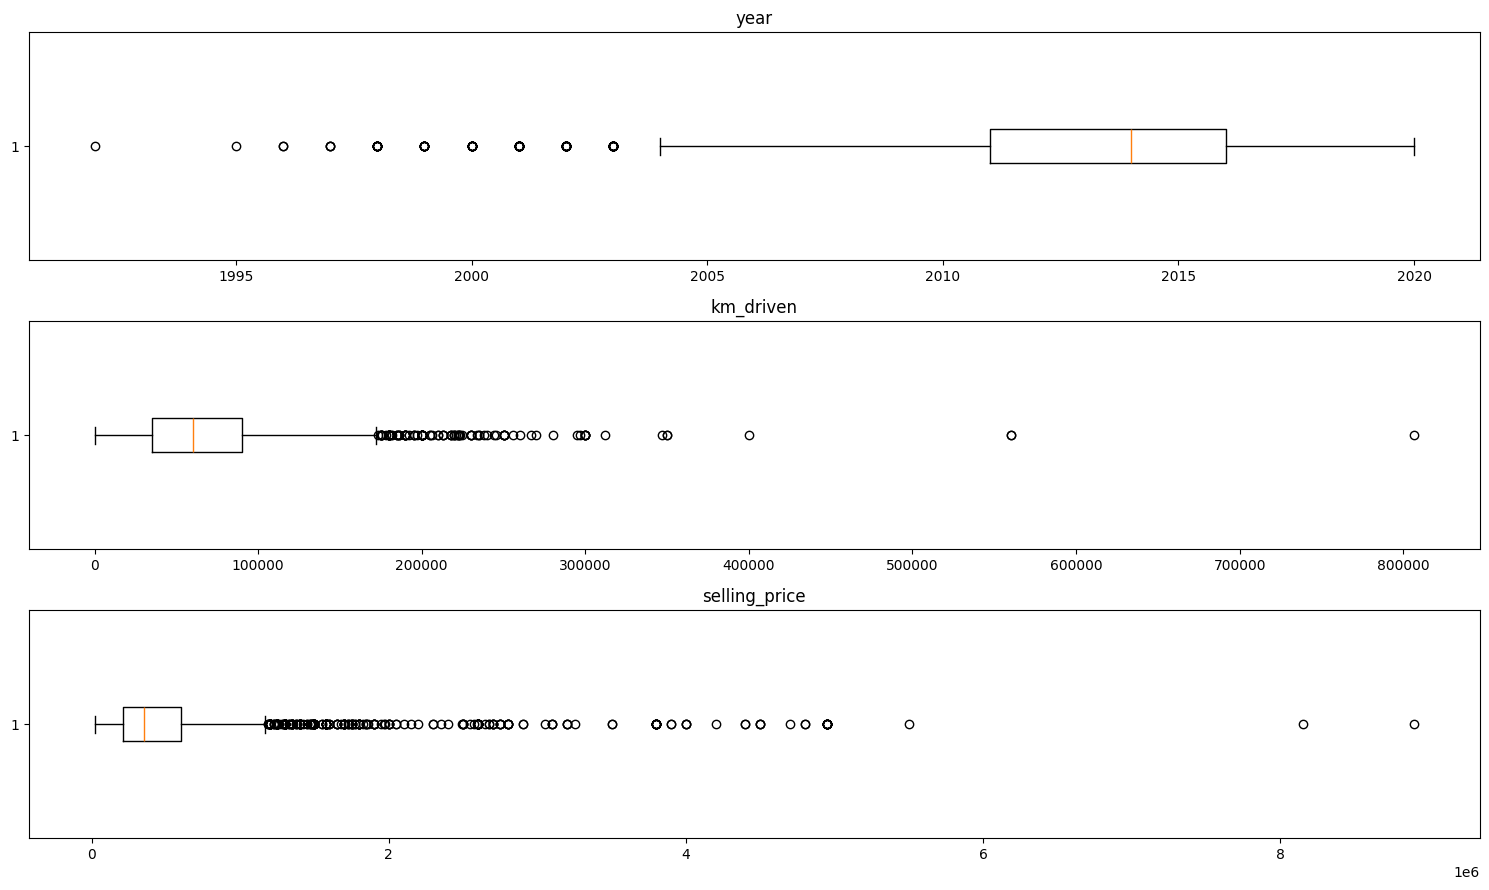

In [16]:
#Lets check there is any outlieres or not.

print("Lets check there is any outlieres or not.........\n")

plt.figure(figsize=(15,3*len(temp2)))

for i in range(1,len(temp2)+1):
    plt.subplot(len(temp2),1,i)
    plt.boxplot(temp2[i-1],data=df,vert=False)
    plt.title(f"{temp2[i-1]}")
plt.tight_layout()
plt.show()

In [17]:
#Lets Remove the Outliers From the Requerede Columns 
print("Lets Remove the Outliers From the Requerede Columns...............\n")
temp3 = ['km_driven','selling_price']

for i in temp3:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)

    iqr = q3-q1

    min_range = q1 - (1.5*iqr)
    max_range = q3 + (1.5*iqr)

    df = df[(df[i] >= min_range) & (df[i] <= max_range)]
print("Outlieres is Removed...............\n")
print("Now",shape_object)

Lets Remove the Outliers From the Requerede Columns...............

Outlieres is Removed...............

Now The Total Rows of the Datasets is 4340 and the total Columns is 8.



Lets Check again there is any outliers is still pending or not.............



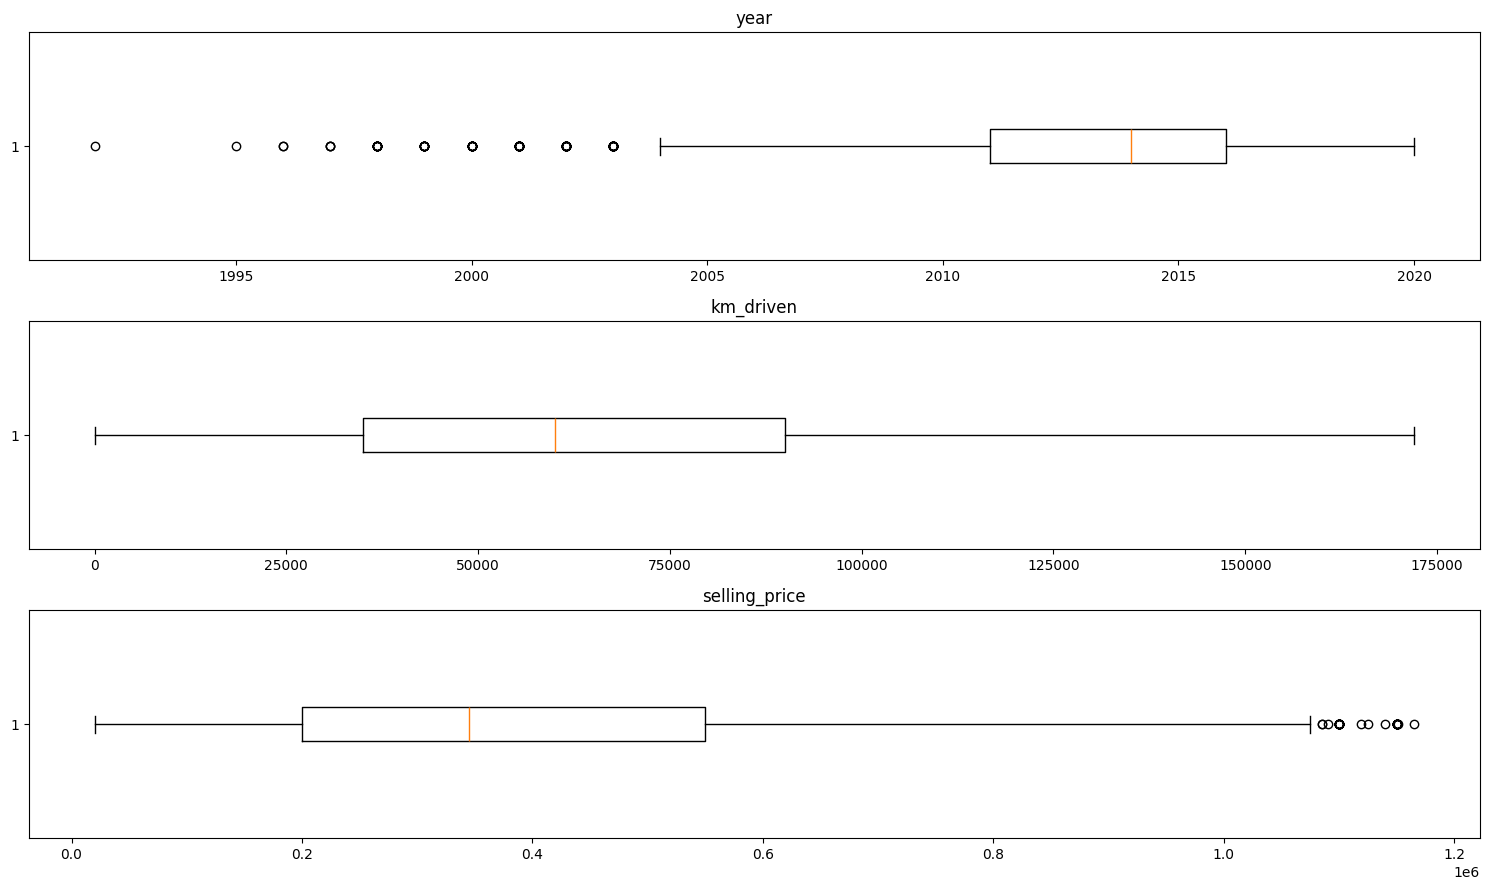

Now There is no any outlieres is present..........



In [18]:
print("Lets Check again there is any outliers is still pending or not.............\n")

plt.figure(figsize=(15,3*len(temp2)))

for j in range(1,len(temp2)+1):
    plt.subplot(len(temp2),1,j)
    plt.boxplot(temp2[j-1],data=df,vert=False)
    plt.title(f"{temp2[j-1]}")
plt.tight_layout()
plt.show()

print("Now There is no any outlieres is present..........\n")

In [19]:
#Lets Devide this into the Saperate columns for the train test split data

x = df.iloc[:,:-1]
y = df['selling_price']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
#Lets Rescale the All the data.
print("Lets Rescale the datasets using StandardScaler........\n")

scaler = StandardScaler()
scaler2 = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

Lets Rescale the datasets using StandardScaler........



In [21]:
#Lets Use first Linear Regression Model.......
print("Lets use the LinearRegression model for predict the Price..........\n")
lr = LinearRegression()

lr.fit(x_train_scaler,y_train)
y_predict_lr = lr.predict(x_test_scaler)

print("Linear Regression Model Performance:\n")
print("Mean Absolute Error (MAE) : ",round(mean_absolute_error(y_test,y_predict_lr)),2)
print("Mean Square Error (MSE):",round(mean_squared_error(y_test,y_predict_lr)),2)
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,y_predict_lr)))
print("R2 Score : ",(r2_score(y_test,y_predict_lr))*100,"%")

Lets use the LinearRegression model for predict the Price..........

Linear Regression Model Performance:

Mean Absolute Error (MAE) :  131253 2
Mean Square Error (MSE): 30868807942 2
Root Mean Squared Error: 175695.21320032064
R2 Score :  50.68689948267029 %


In [22]:
#Lets see the Decision Tree Regressor Model.

print("Lets use the Decision Tree Regressor Model..........\n")

dtrm = DecisionTreeRegressor(max_depth=10,random_state=42)

dtrm.fit(x_train,y_train)
y_predict_dtrm = dtrm.predict(x_test)

print("Decision Tree Model Performance:\n")
print("Mean Absolute Error (MAE) : ",round(mean_absolute_error(y_test,y_predict_dtrm)),2)
print("Mean Square Error (MSE):",round(mean_squared_error(y_test,y_predict_dtrm)),2)
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,y_predict_dtrm)))
print("R2 Score : ",(r2_score(y_test,y_predict_dtrm))*100,"%")

Lets use the Decision Tree Regressor Model..........

Decision Tree Model Performance:

Mean Absolute Error (MAE) :  85853 2
Mean Square Error (MSE): 18051702215 2
Root Mean Squared Error: 134356.623262771
R2 Score :  71.16230054937566 %


In [ ]:
# Lets use XGBoost Regressor

print("Lets use the XGBoost Regressor Model..........\n")

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective='reg:squarederror'
)

xgb.fit(x_train,y_train)
y_predict_xgb = xgb.predict(x_test)

print("XGBoost Model Performance:\n")
print("Mean Absolute Error (MAE) : ",round(mean_absolute_error(y_test,y_predict_xgb)),2)
print("Mean Square Error (MSE):",round(mean_squared_error(y_test,y_predict_xgb)),2)
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,y_predict_xgb)))
print("R2 Score : ",(r2_score(y_test,y_predict_xgb))*100,"%")

In [31]:
df.head()

,brand,unique_model_number,year,fuel,transmission,km_driven,owner,seller_type,selling_price
0,97,431,2007,4,1,70000,0,1,60000
1,117,960,2007,4,1,50000,0,1,135000
2,69,231,2012,1,1,100000,0,1,600000
3,27,1103,2017,4,1,46000,0,1,250000
4,47,1182,2014,1,1,141000,2,1,450000


In [47]:
#User Input.
print("Lets Get the User Input and predict the Car Price for each model............\n")

print("Enter the Car Details here.........\n")

"""
fule_details = ['Petrol', 'Diesel', 'CNG', 'LPG' ,'Electric']
transmission_details = ['Manual' ,'Automatic']
owner_details = ['First Owner' ,'Second Owner' ,'Fourth & Above Owner' ,'Third Owner','Test Drive Car']
seller_type_details = ['Individual', 'Dealer' ,'Trustmark Dealer']
   
brand = input("Enter the Car Brand(e.g. Maruti Wagon):")
unique_model_number = input("Enter the Unique model number of the car(e.g. R LXI Minor):")
year=int(input("Enter the Year:"))
fuel = input(f"Enter the Fule Details from the {fule_details}:")
transmission = input(f"Enter the car Manuality from {transmission_details}")
km_driven = float(input("Enter the KM Driven(e.g. 10526.2):"))
owner = input(f"Enter the Owner type from {owner_details}:")
seller_type = input(f"Enter the Seller type from {seller_type_details}:")

user_data = {
    'brand' : brand,
    'unique_model_number' : unique_model_number,
    'year':year,
    'fuel' : fuel,
    'transmission' : transmission,
    'km_driven' : km_driven,
    'owner' : owner,
    'seller_type' : seller_type,
}
"""
brand = "Maruti Wagon"
unique_model_number = "R LXI Minor"
year = 2015
fuel = "Petrol"
transmission = "Manual"
km_driven = 45200.5
owner = "First Owner"
seller_type = "Individual"

user_data = {
    'brand': brand,
    'unique_model_number': unique_model_number,
    'year': year,
    'fuel': fuel,
    'transmission': transmission,
    'km_driven': km_driven,
    'owner': owner,
    'seller_type': seller_type,
}

data = pd.DataFrame([user_data])

temp4 = []  # Categorical
temp5 = []  # Numeric

for i in data.columns:
    if data[i].dtype == 'object':
        temp4.append(i)
    else:
        temp5.append(i)

for i in temp4:
    data[i] = lb.fit_transform(data[i])

user_data_scaled = scaler.transform(data)

# Predictions
predicted_price_lr = lr.predict(user_data_scaled)
predicted_price_dtrm = dtrm.predict(user_data_scaled)
# predicted_price_xgboost = xgb.predict(user_data_scaled)

# Extract and round values
predicted_price_lr = round(predicted_price_lr[0], 2)
predicted_price_dtrm = round(predicted_price_dtrm[0], 2)
# predicted_price_xgboost = round(predicted_price_xgboost[0], 2)

print("\n---------------------------------------------")
print(f"Using Linear Regression, Predicted Price: ₹{predicted_price_lr}")
print(f"Using Decision Tree Regressor, Predicted Price: ₹{predicted_price_dtrm}")
# print(f"Using XGBoost, Predicted Price: ₹{predicted_price_xgboost}")
print("---------------------------------------------")

Lets Get the User Input and predict the Car Price for each model............

Enter the Car Details here.........


---------------------------------------------
Using Linear Regression, Predicted Price: ₹794083.89
Using Decision Tree Regressor, Predicted Price: ₹850000.0
---------------------------------------------


C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
